In [3]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Sebyb\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Sebyb\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\Sebyb\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Read the data from the CSV file
filename = 'ablation_results/ablation_fold_details_2.csv'
data = pandas.read_csv(filename)


# Split hyperparameters into separate columns from dict, with keys as column names
data = data.join(data['Hyperparameters'].apply(eval).apply(pandas.Series))

# Convert to dataframe
data = pandas.DataFrame(data)

# Convert all column names to lower case and remove spaces with _
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.columns)

# Apply eval to the train and val losses columns
data['train_losses'] = data['train_losses'].apply(eval)
data['val_losses'] = data['val_losses'].apply(eval)

print(data.head(1))

Index(['fold', 'hyperparameters', 'train_losses', 'val_losses', 'val_accuracy',
       'val_precision', 'val_recall', 'val_f1', 'time_taken',
       'early_stop_epoch', 'epochs', 'lr', 'bn', 'batch_size', 'dropout_rate',
       'hidden_layers', 'activations', 'input_size', 'weight_decay',
       'optimiser', 'early_stopping'],
      dtype='object')
   fold                                    hyperparameters  \
0     1  {"epochs": 50, "lr": 0.001, "bn": 0, "batch_si...   

                                        train_losses  \
0  [1.7113987304000648, 1.5396676650237835, 1.479...   

                                          val_losses  val_accuracy  \
0  [1.7549325091741776, 1.7033430330054082, 1.671...        0.4252   

   val_precision  val_recall   val_f1  time_taken  early_stop_epoch  ...  \
0       0.428593    0.428503  0.41148   24.066002              19.0  ...   

      lr  bn  batch_size  dropout_rate  hidden_layers            activations  \
0  0.001   0           4     [0, 0, 0

In [5]:
print(data.columns)
# Columns: ['fold', 'hyperparameters', 'train_losses', 'val_losses', 'val_accuracy','val_precision', 'val_recall', 'val_f1', 'time_taken','early_stop_epoch', 'epochs', 'lr', 'bn', 'batch_size', 'dropout_rate','hidden_layers', 'activations', 'input_size', 'weight_decay','optimiser', 'early_stopping']

Index(['fold', 'hyperparameters', 'train_losses', 'val_losses', 'val_accuracy',
       'val_precision', 'val_recall', 'val_f1', 'time_taken',
       'early_stop_epoch', 'epochs', 'lr', 'bn', 'batch_size', 'dropout_rate',
       'hidden_layers', 'activations', 'input_size', 'weight_decay',
       'optimiser', 'early_stopping'],
      dtype='object')


In [18]:
# Collate the first 10 train losses into a list
# train_losses = np.ndarray(shape=(10, 50))
# for i in range(10):
#     # Fill the ith row with the train losses of the ith fold filling with zeros if the length is less than 50
#     train_losses[i, :len(data.iloc[i]['train_losses'])] = data.iloc[i]['train_losses']

# # Collate the first 10 val losses into a list
# val_losses = np.ndarray(shape=(10, 50))
# for i in range(10):
#     val_losses[i, :len(data.iloc[i]['val_losses'])] = data.iloc[i]['val_losses']
    
    
# # Create an average of the first 10 train losses between the folds, dividing each element by the number of non-zero elements
# # train_losses_avg = np.sum(train_losses, axis=0) / np.sum(train_losses != 0, axis=0)
# # val_losses_avg = np.sum(val_losses, axis=0) / np.sum(val_losses != 0, axis=0)

# print(train_losses)
# print(np.sum(train_losses, axis=0))
# print(np.sum(train_losses != 0, axis=0))
# print(np.sum(train_losses, axis=0) / np.sum(train_losses != 0, axis=0))

# # print(train_losses_avg)
# # print(train_losses_avg)
# # print(val_losses_avg)

# # Plot the average train and val losses over the epochs (iterations/index in the array)
# plt.plot(train_losses_avg, label='Train Loss')
# plt.plot(val_losses_avg, label='Val Loss')
# plt.legend()
# plt.show()

[[1.71139873e+000 1.53966767e+000 1.47969627e+000 1.40743272e+000
  1.39747641e+000 1.37984252e+000 1.33553128e+000 1.35533117e+000
  1.34845115e+000 1.32164582e+000 1.30296344e+000 1.30891648e+000
  1.30247232e+000 1.31352865e+000 1.28691042e+000 1.30384978e+000
  1.30749765e+000 1.28542162e+000 1.27988216e+000 1.48219694e-323
  3.41641322e-312 4.94065646e-324 0.00000000e+000 1.48219694e-323
  1.90979621e-312 1.48219694e-323 0.00000000e+000 1.48219694e-323
  2.14321575e-312 1.48219694e-323 0.00000000e+000 3.45845952e-323
  3.39519327e-312 1.97626258e-323 0.00000000e+000 3.45845952e-323
  2.14321575e-312 1.48219694e-323 0.00000000e+000 3.45845952e-323
  2.12199579e-312 4.94065646e-324 0.00000000e+000 3.45845952e-323
  5.30498948e-313 0.00000000e+000 0.00000000e+000 3.45845952e-323
  3.39519327e-312 2.47032823e-323]
 [1.74458538e+000 1.52166107e+000 1.45080681e+000 1.42518761e+000
  1.38943090e+000 1.37725722e+000 1.36118514e+000 1.34273881e+000
  1.32608852e+000 1.31272372e+000 1.31131

NameError: name 'train_losses_avg' is not defined

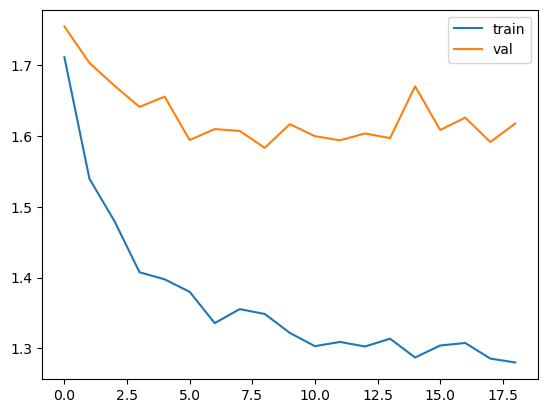

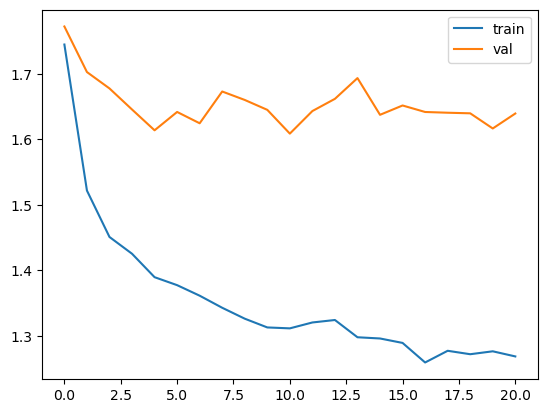

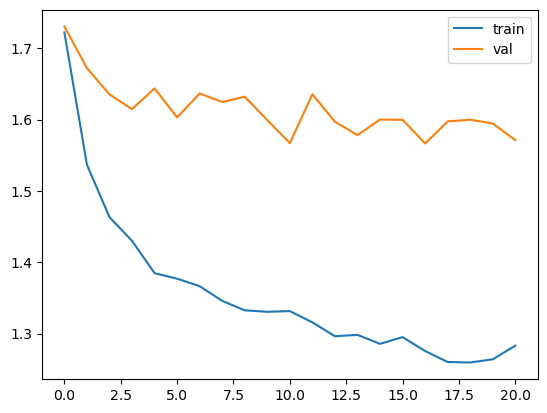

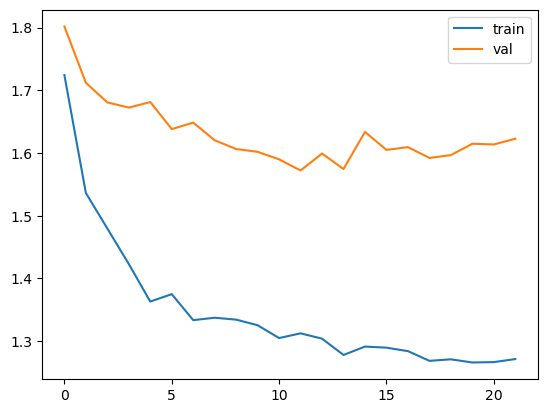

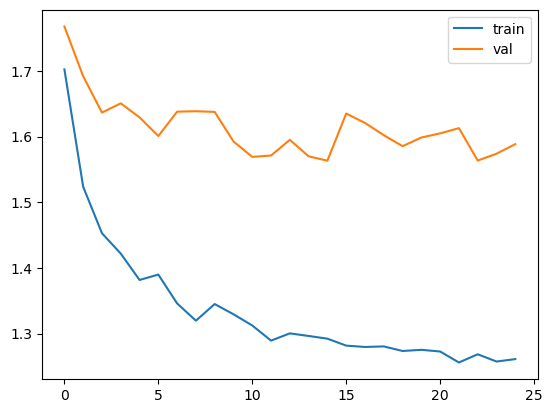

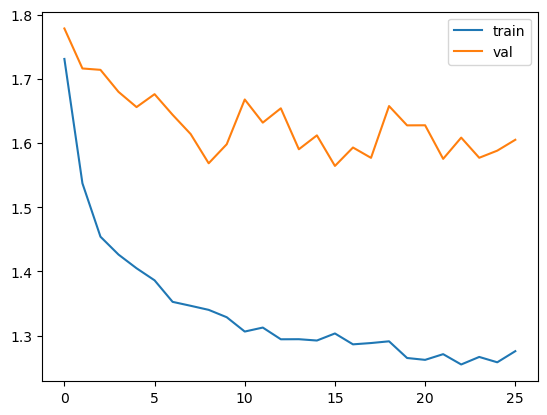

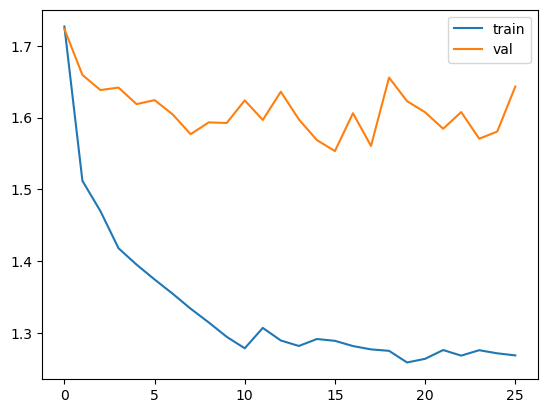

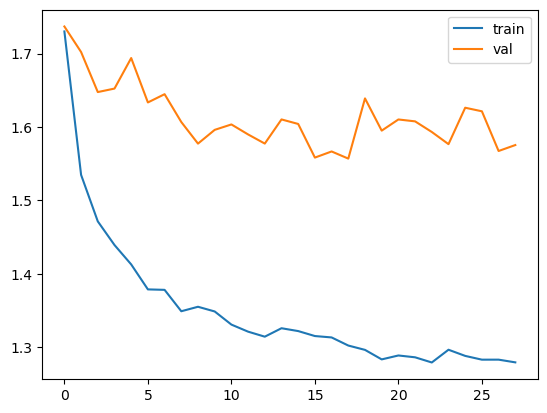

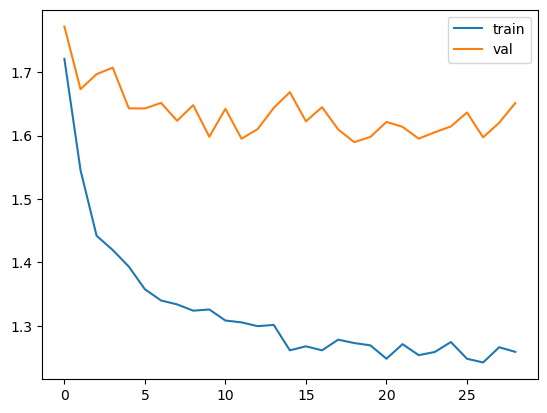

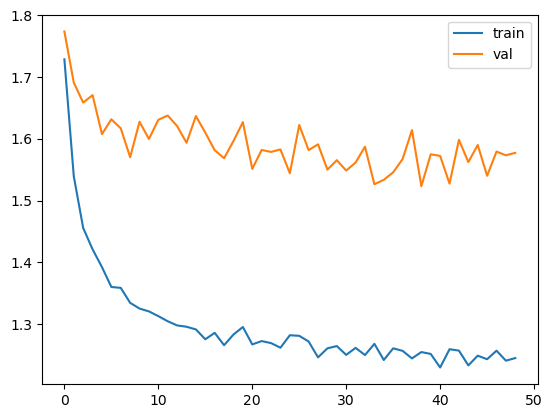

In [19]:
# Plot the training and validation losses of the first 10 folds / rows against the epoch / iteration
for i in range(10):
    plt.plot(data.iloc[i]['train_losses'], label='train')
    plt.plot(data.iloc[i]['val_losses'], label='val')
    plt.legend()
    plt.show()


In [7]:
##### Baseline data #####
# set first 10 rows as data_baseline
data_baseline = data.iloc[:10]
# print(data_baseline.head())

In [8]:


# Find the folds with the str typecast of activations equals the string ['None', 'tanh', 'softmax']
data_activations_tanh = data[data['activations'].astype(str) == "['None', 'tanh', 'softmax']"]
data_activations_logistic = data[data['activations'].astype(str) == "['None', 'logistic', 'softmax']"]
#print(data_activations_tanh)
#print(data_activations_logistic)
# Print unique values of the activations column
# print(str(data['activations'][189]) == "['None', 'tanh', 'softmax']")

In [13]:
# Function to create average train and val losses across the folds for a given dataframe
def create_avg_train_val_losses(data):
    # Collate the first 10 train losses into a list
    train_losses = np.ndarray(shape=(10, 50))
    for i in range(10):
        # Fill the ith row with the train losses of the ith fold filling with zeros if the length is less than 50
        train_losses[i, :len(data.iloc[i]['train_losses'])] = data.iloc[i]['train_losses']

    # Collate the first 10 val losses into a list
    val_losses = np.ndarray(shape=(10, 50))
    for i in range(10):
        val_losses[i, :len(data.iloc[i]['val_losses'])] = data.iloc[i]['val_losses']

    # Create an average of the first 10 train losses between the folds, dividing each element by the number of non-zero elements
    train_losses_avg = np.sum(train_losses, axis=0) / np.sum(train_losses != 0, axis=0)
    print(np.sum(train_losses, axis=0))
    print(np.sum(train_losses != 0, axis=0))
    # print the average train losses to 3 decimal places
    print(np.round(train_losses_avg, 3))
    val_losses_avg = np.sum(val_losses, axis=0) / np.sum(val_losses != 0, axis=0)
    return train_losses_avg, val_losses_avg

In [15]:
# Create the average train and val losses for the baseline data
train_losses_avg_baseline, val_losses_avg_baseline = create_avg_train_val_losses(data_baseline)

# Create the average train and val losses for the tanh activation data
train_losses_avg_tanh, val_losses_avg_tanh = create_avg_train_val_losses(data_activations_tanh)

# Create the average train and val losses for the logistic activation data
train_losses_avg_logistic, val_losses_avg_logistic = create_avg_train_val_losses(data_activations_logistic)

[17.24205462 15.32644794 14.61863493 14.23125642 13.91472321 13.75574954
 13.52654611 13.39815717 13.34510822 13.2377682  13.09988607 13.0973032
 13.02240532 12.98283371 12.91043023 12.90975423 12.83441266 12.78330367
 12.77411474 11.4532155  11.42089889  8.90444506  7.59417614  7.61725942
  7.63585079  6.35666889  3.79706343  3.79175123  2.51950781  1.26415419
  1.24987588  1.26124186  1.24960523  1.26775785  1.24161227  1.26048248
  1.25642631  1.24416256  1.25445629  1.25137399  1.22947064  1.25908311
  1.25679798  1.2328743   1.24857478  1.24286757  1.25667987  1.2405038
  1.24471862  0.        ]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  9  9  7  6  6
  6  5  3  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0]
[1.724 1.533 1.462 1.423 1.391 1.376 1.353 1.34  1.335 1.324 1.31  1.31
 1.302 1.298 1.291 1.291 1.283 1.278 1.277 1.273 1.269 1.272 1.266 1.27
 1.273 1.271 1.266 1.264 1.26  1.264 1.25  1.261 1.25  1.268 1.242 1.26
 1.256 1.244 1.254 1.2

C:\Users\Sebyb\AppData\Local\Temp\ipykernel_11436\435908772.py:15: RuntimeWarning: invalid value encountered in divide
  train_losses_avg = np.sum(train_losses, axis=0) / np.sum(train_losses != 0, axis=0)


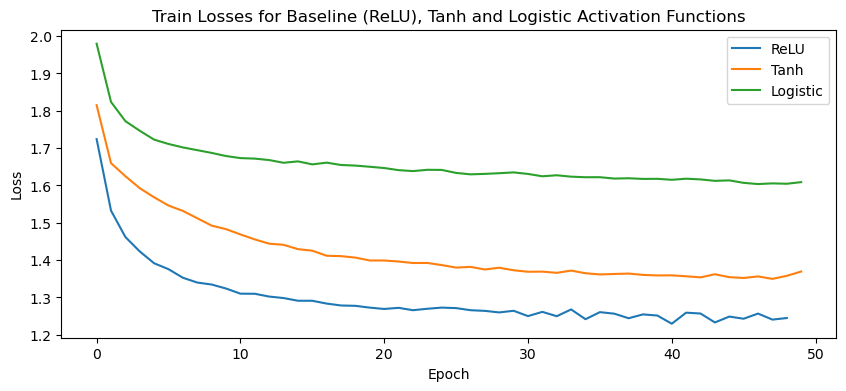

In [26]:
train_losses_avg_baseline

# Plot the train losses for the baseline, tanh and logistic activation data
plt.figure(figsize=(10, 4))
plt.title('Train Losses for Baseline (ReLU), Tanh and Logistic Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_losses_avg_baseline, label='ReLU')
plt.plot(train_losses_avg_tanh, label='Tanh')
plt.plot(train_losses_avg_logistic, label='Logistic')
plt.legend()
plt.show()

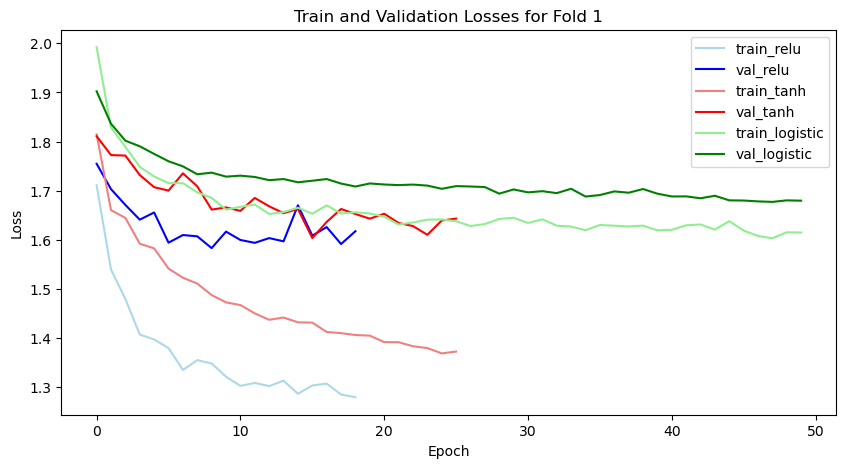

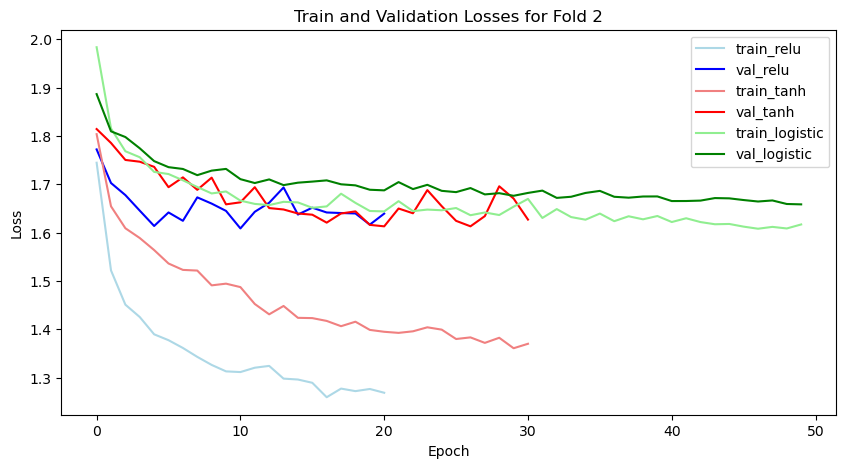

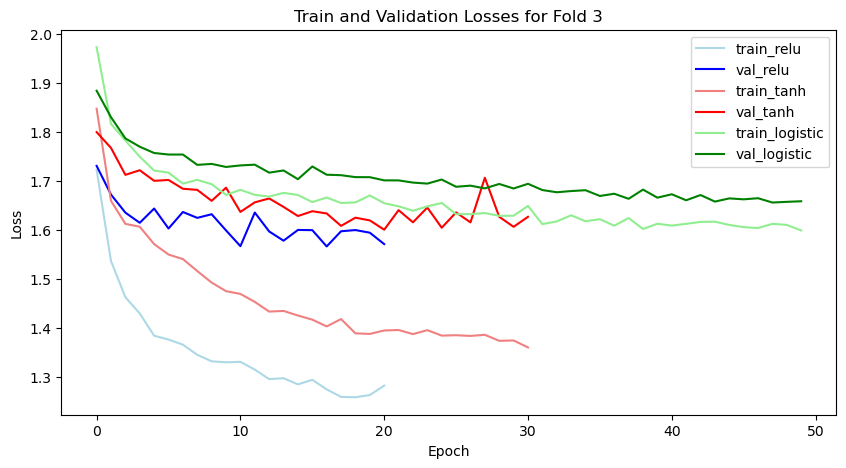

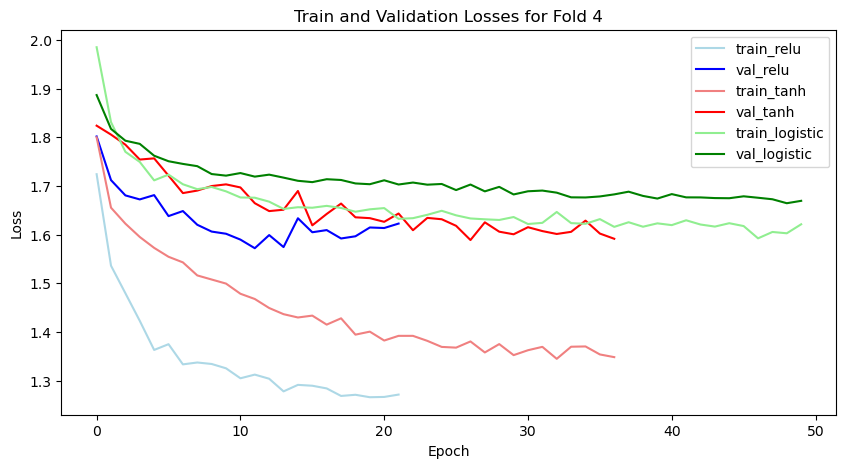

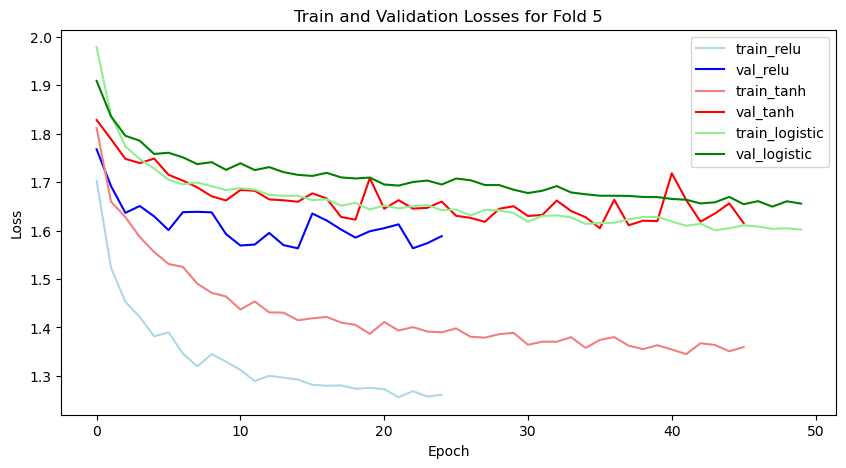

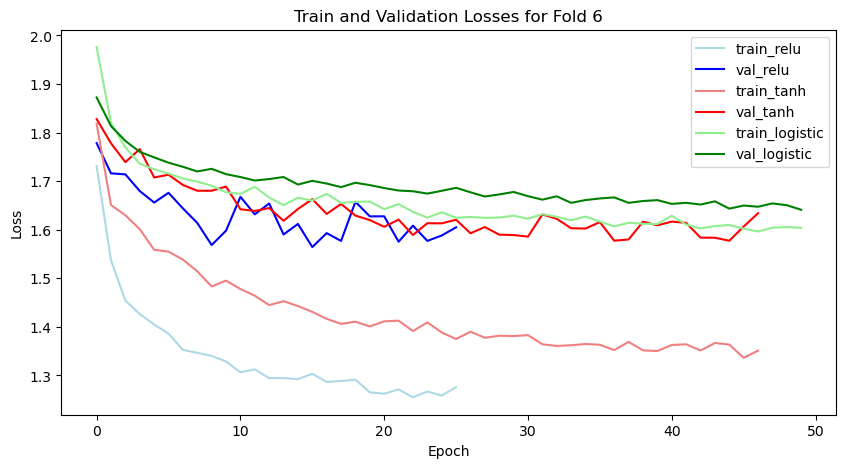

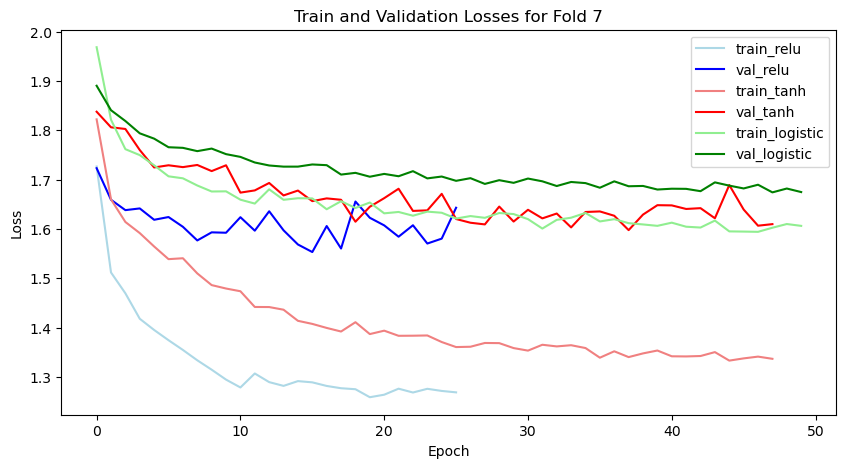

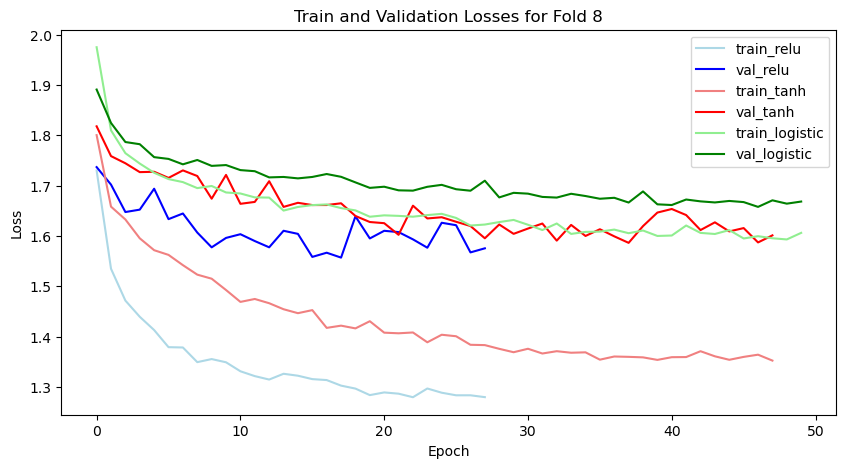

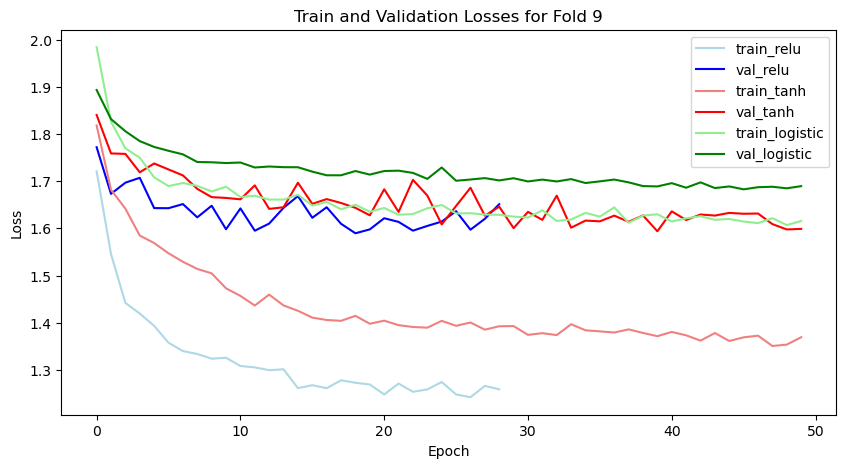

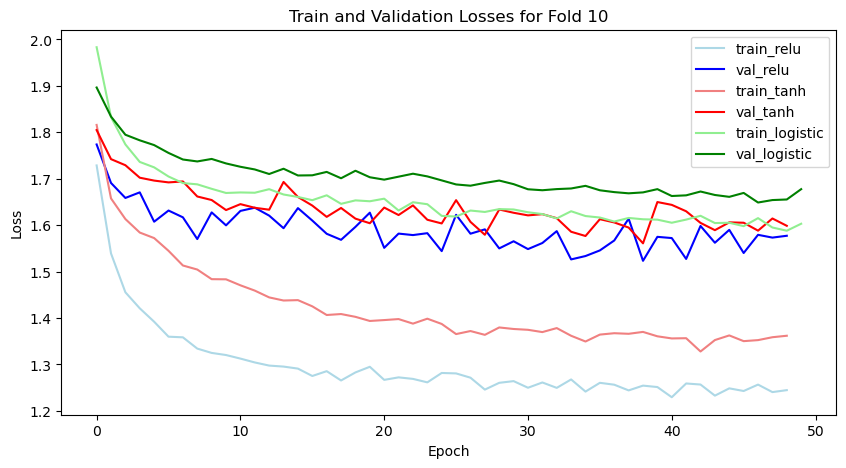

In [9]:
# Graph the average training and validation losses of the baseline and the activation functions tanh and logistic
# 2 hues of the same color for each of the train and val losses per activation function. eg. relu blue and light blue, tanh red and light red, logistic green and light green
for i in range(10):
    # Set plot size
    plt.figure(figsize=(10, 5))
    # Set plot title and axis labels
    plt.title('Train and Validation Losses for Fold ' + str(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # Plot the training and validation losses for the baseline, tanh and logistic activation functions
    plt.plot(data_baseline.iloc[i]['train_losses'], label='train_relu', color='lightblue')
    plt.plot(data_baseline.iloc[i]['val_losses'], label='val_relu', color='blue')
    plt.plot(data_activations_tanh.iloc[i]['train_losses'], label='train_tanh', color='lightcoral')
    plt.plot(data_activations_tanh.iloc[i]['val_losses'], label='val_tanh', color='red')
    plt.plot(data_activations_logistic.iloc[i]['train_losses'], label='train_logistic', color='lightgreen')
    plt.plot(data_activations_logistic.iloc[i]['val_losses'], label='val_logistic', color='green')
    plt.legend()
    plt.show()

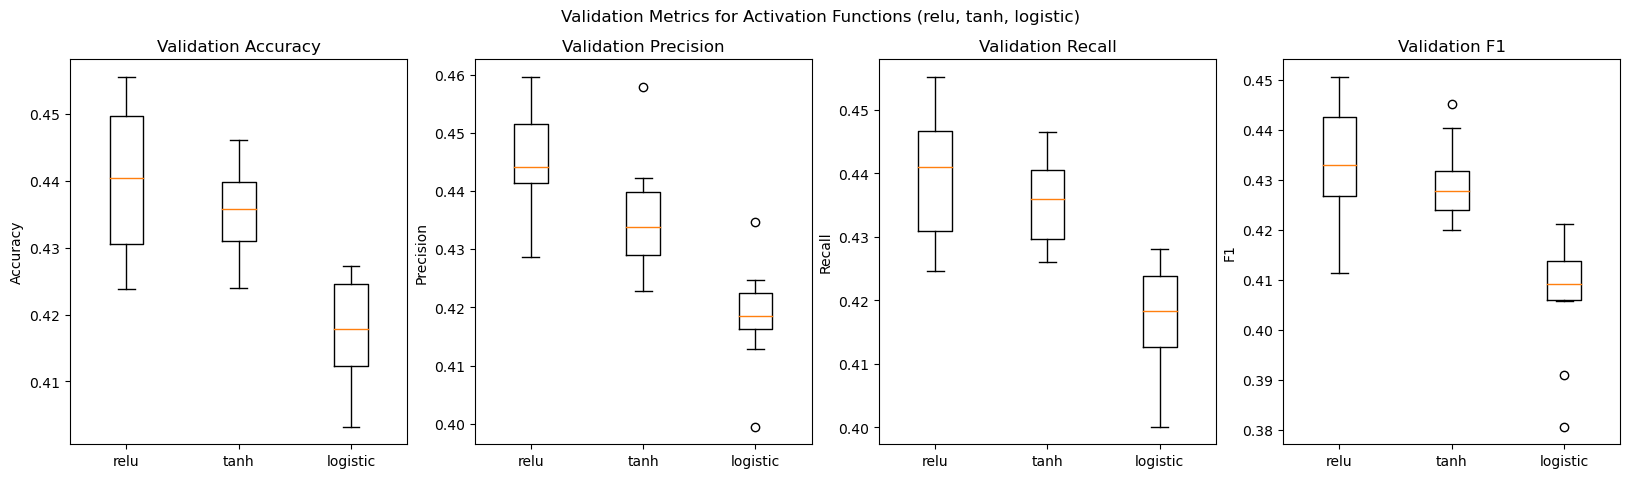

In [125]:
# Group plots for each metric (val_accuracy, val_precision, val_recall, val_f1) into a single figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Validation Metrics for Activation Functions (relu, tanh, logistic)')
# Align labels of y-axis for all subplots, only show the label for the first subplot
# Plot the boxplots for each metric in each subplot
axs[0].set_title('Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].boxplot([data_baseline['val_accuracy'], data_activations_tanh['val_accuracy'], data_activations_logistic['val_accuracy']], labels=['relu', 'tanh', 'logistic'])
axs[1].set_title('Validation Precision')
axs[1].set_ylabel('Precision')
axs[1].boxplot([data_baseline['val_precision'], data_activations_tanh['val_precision'], data_activations_logistic['val_precision'],], labels=['relu', 'tanh', 'logistic'])
axs[2].set_title('Validation Recall')
axs[2].set_ylabel('Recall')
axs[2].boxplot([data_baseline['val_recall'], data_activations_tanh['val_recall'], data_activations_logistic['val_recall'],], labels=['relu', 'tanh', 'logistic'])
axs[3].set_title('Validation F1')
axs[3].set_ylabel('F1')
axs[3].boxplot([data_baseline['val_f1'], data_activations_tanh['val_f1'], data_activations_logistic['val_f1'],], labels=['relu', 'tanh', 'logistic'])
plt.show()

## Batch Sizes

In [27]:
# Analysis of batch sizes
# Find the folds with the batch size equals [1,2,4,8,16,32,64]
data_batch_size_1 = data[data['batch_size'] == 1]
data_batch_size_2 = data[data['batch_size'] == 2]
data_batch_size_8 = data[data['batch_size'] == 8]
data_batch_size_16 = data[data['batch_size'] == 16]
data_batch_size_32 = data[data['batch_size'] == 32]
data_batch_size_64 = data[data['batch_size'] == 64]

In [28]:
# Graph the average training and validation losses of the baseline and the batch sizes 1, 2, 8, 16, 32, 64
# 2 hues of the same color for each of the train and val losses per batch size. eg. 1 blue and light blue, 2 red and light red, 8 green and light green

# Create the average train and val losses for the batch size 1
train_losses_avg_batch_size_1, val_losses_avg_batch_size_1 = create_avg_train_val_losses(data_batch_size_1)

# Create the average train and val losses for the batch size 2
train_losses_avg_batch_size_2, val_losses_avg_batch_size_2 = create_avg_train_val_losses(data_batch_size_2)

# Create the average train and val losses for the batch size 8
train_losses_avg_batch_size_8, val_losses_avg_batch_size_8 = create_avg_train_val_losses(data_batch_size_8)

# Create the average train and val losses for the batch size 16
train_losses_avg_batch_size_16, val_losses_avg_batch_size_16 = create_avg_train_val_losses(data_batch_size_16)

# Create the average train and val losses for the batch size 32
train_losses_avg_batch_size_32, val_losses_avg_batch_size_32 = create_avg_train_val_losses(data_batch_size_32)

# Create the average train and val losses for the batch size 64
train_losses_avg_batch_size_64, val_losses_avg_batch_size_64 = create_avg_train_val_losses(data_batch_size_64)



[18.23107648 16.46967642 16.00449806 15.75323982 15.6028189  15.49299984
 15.4197995  15.36119197 15.31784433 15.28228931 15.25727507 15.23562457
 15.2161977  15.19852117 15.18375995 15.16796256 15.1577217  15.14566111
 15.14103921 15.13455248 15.12305883 15.11690846 15.11188071 15.10254414
 15.10095355 15.0957863  13.58410236 12.07006553 12.07092093 12.06892779
 12.06379926  9.04775591  9.04551475  9.04466519  9.04443276  9.04238021
  9.04137364  9.04107143  9.03784615  9.03651896  9.036096    7.53206086
  7.52878397  6.02139156  6.01977378  4.51752266  4.51680174  4.51520241
  4.51763413  3.01032167]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10  9  8  8  8  8  6  6  6  6  6  6  6  6  6  6  5  5  4  4  3  3  3
  3  2]
[1.823 1.647 1.6   1.575 1.56  1.549 1.542 1.536 1.532 1.528 1.526 1.524
 1.522 1.52  1.518 1.517 1.516 1.515 1.514 1.513 1.512 1.512 1.511 1.51
 1.51  1.51  1.509 1.509 1.509 1.509 1.508 1.508 1.508 1.507 1.507 1.507
 1.507 1.507 1.506

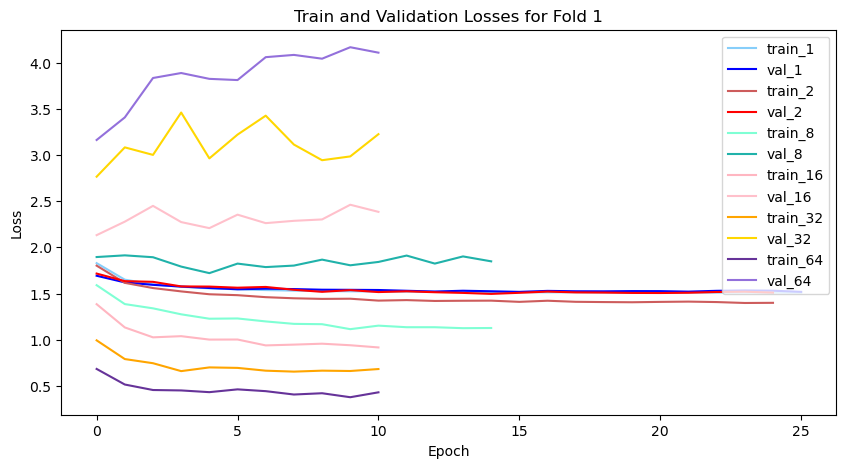

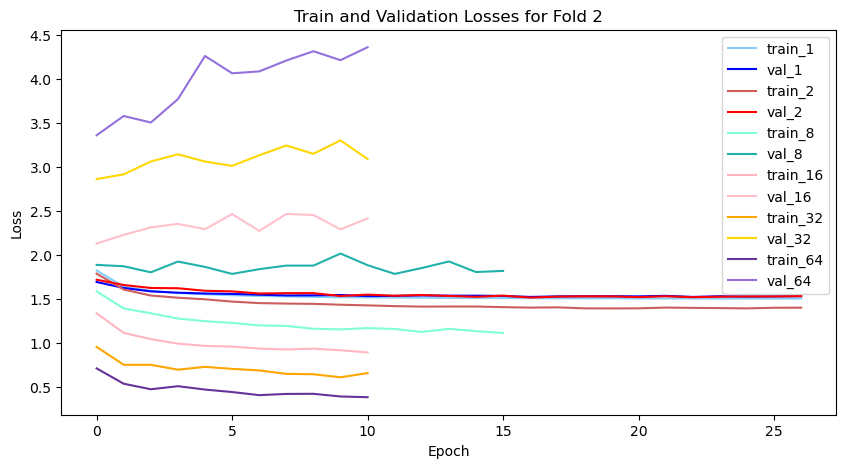

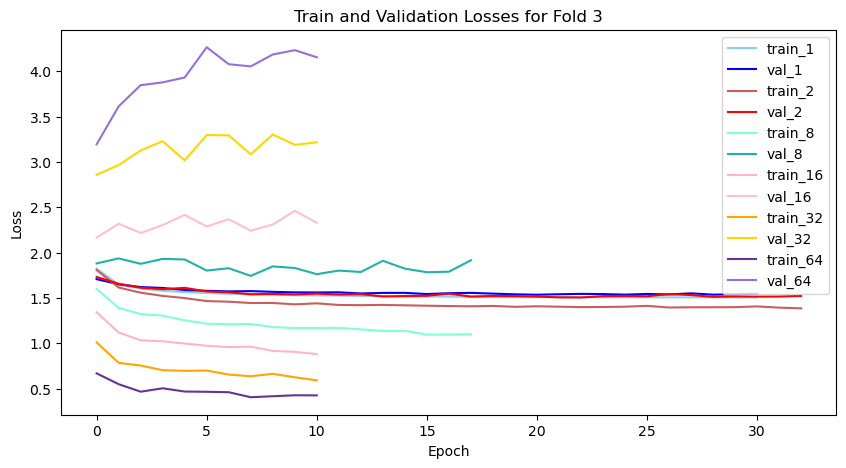

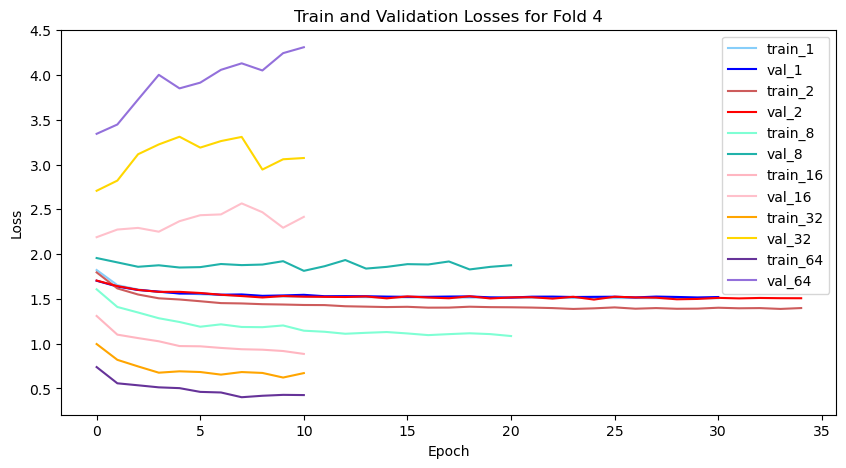

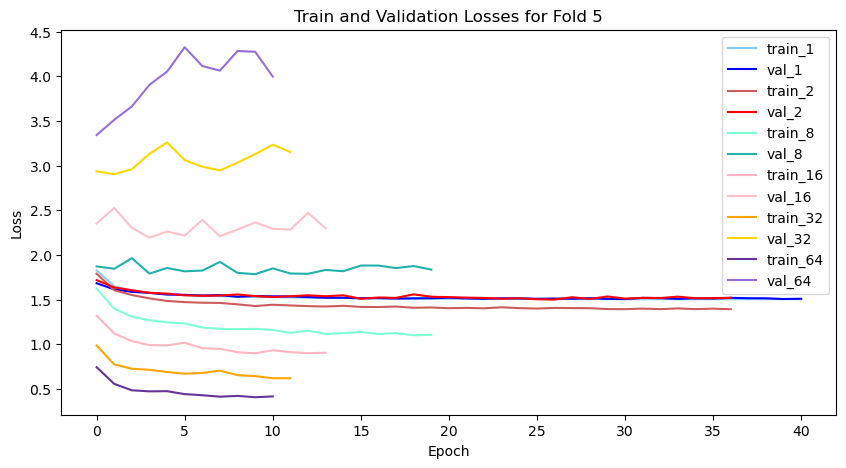

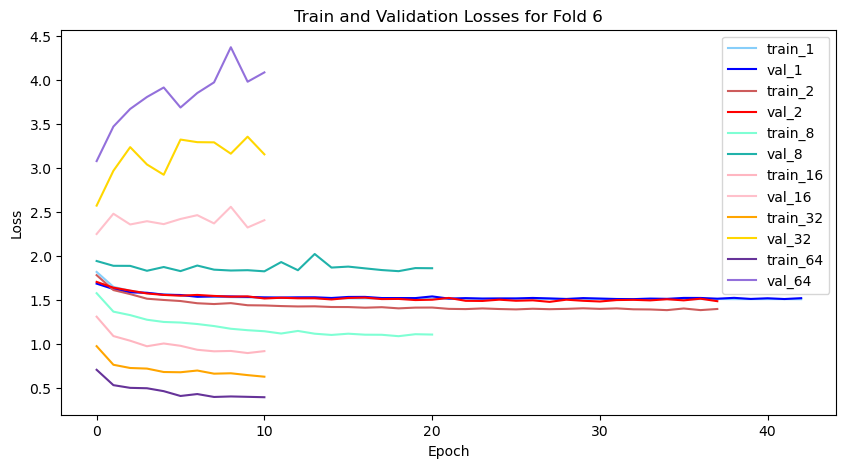

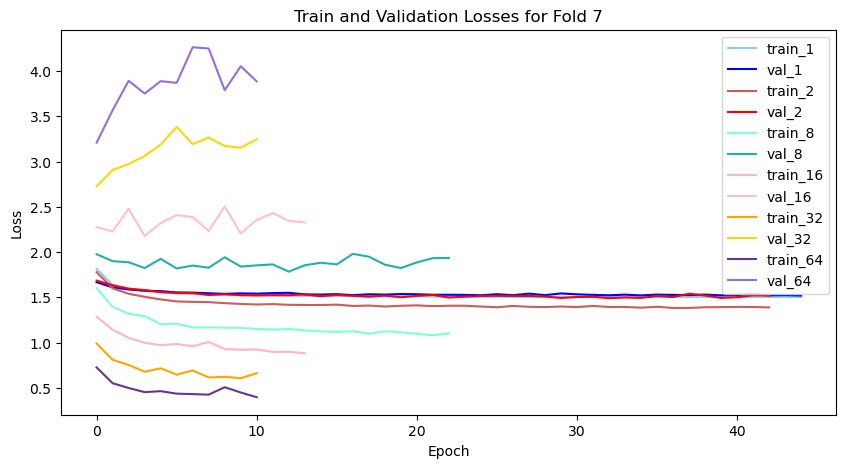

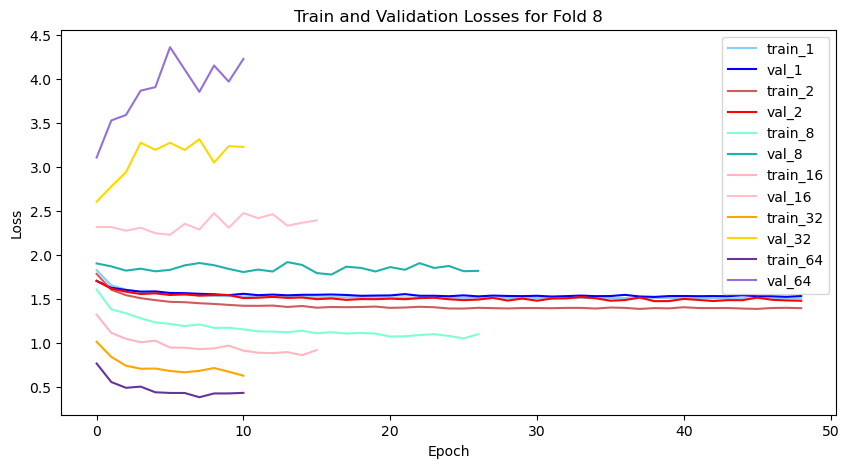

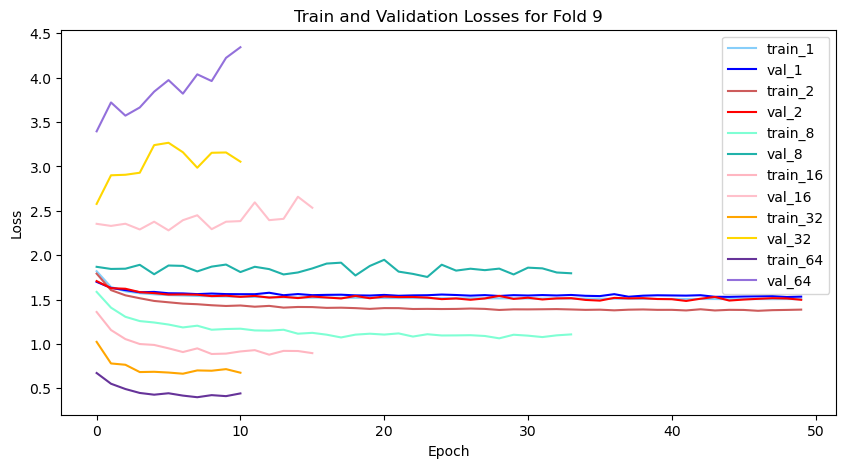

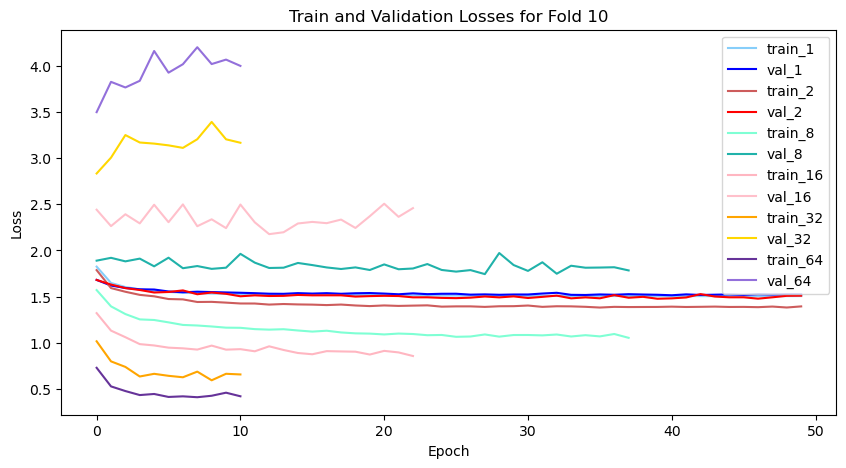

In [34]:
# Graph the training and validation losses for the batch sizes 1, 2, 8, 16, 32, 64 per fold
for i in range(10):
    # Set plot size
    plt.figure(figsize=(10, 5))
    # Set plot title and axis labels
    plt.title('Train and Validation Losses for Fold ' + str(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # Plot the training and validation losses for the batch sizes 1, 2, 8, 16, 32, 64
    plt.plot(data_batch_size_1.iloc[i]['train_losses'], label='train_1', color='lightskyblue')
    plt.plot(data_batch_size_1.iloc[i]['val_losses'], label='val_1', color='blue')
    plt.plot(data_batch_size_2.iloc[i]['train_losses'], label='train_2', color='indianred')
    plt.plot(data_batch_size_2.iloc[i]['val_losses'], label='val_2', color='red')
    plt.plot(data_batch_size_8.iloc[i]['train_losses'], label='train_8', color='aquamarine')
    plt.plot(data_batch_size_8.iloc[i]['val_losses'], label='val_8', color='lightseagreen')
    plt.plot(data_batch_size_16.iloc[i]['train_losses'], label='train_16', color='lightpink')
    plt.plot(data_batch_size_16.iloc[i]['val_losses'], label='val_16', color='pink')
    plt.plot(data_batch_size_32.iloc[i]['train_losses'], label='train_32', color='orange')
    plt.plot(data_batch_size_32.iloc[i]['val_losses'], label='val_32', color='gold')
    plt.plot(data_batch_size_64.iloc[i]['train_losses'], label='train_64', color='rebeccapurple')
    plt.plot(data_batch_size_64.iloc[i]['val_losses'], label='val_64', color='mediumpurple')
    plt.legend()
    plt.show()

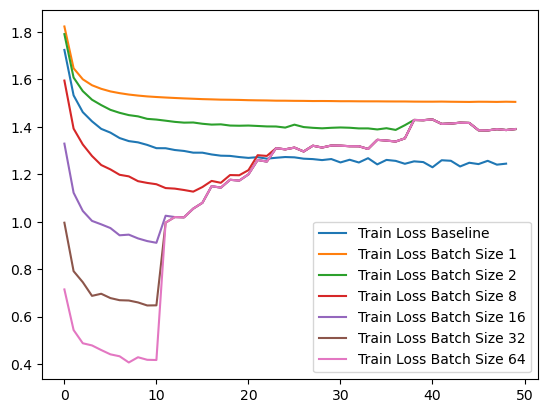

In [29]:
# Plot the average train and val losses over the epochs (iterations/index in the array)
plt.plot(train_losses_avg_baseline, label='Train Loss Baseline')
# plt.plot(val_losses_avg_baseline, label='Val Loss Baseline')
plt.plot(train_losses_avg_batch_size_1, label='Train Loss Batch Size 1')
# plt.plot(val_losses_avg_batch_size_1, label='Val Loss Batch Size 1')
plt.plot(train_losses_avg_batch_size_2, label='Train Loss Batch Size 2')
# plt.plot(val_losses_avg_batch_size_2, label='Val Loss Batch Size 2')
plt.plot(train_losses_avg_batch_size_8, label='Train Loss Batch Size 8')
# plt.plot(val_losses_avg_batch_size_8, label='Val Loss Batch Size 8')
plt.plot(train_losses_avg_batch_size_16, label='Train Loss Batch Size 16')
# plt.plot(val_losses_avg_batch_size_16, label='Val Loss Batch Size 16')
plt.plot(train_losses_avg_batch_size_32, label='Train Loss Batch Size 32')
# plt.plot(val_losses_avg_batch_size_32, label='Val Loss Batch Size 32')
plt.plot(train_losses_avg_batch_size_64, label='Train Loss Batch Size 64')
# plt.plot(val_losses_avg_batch_size_64, label='Val Loss Batch Size 64')
plt.legend()


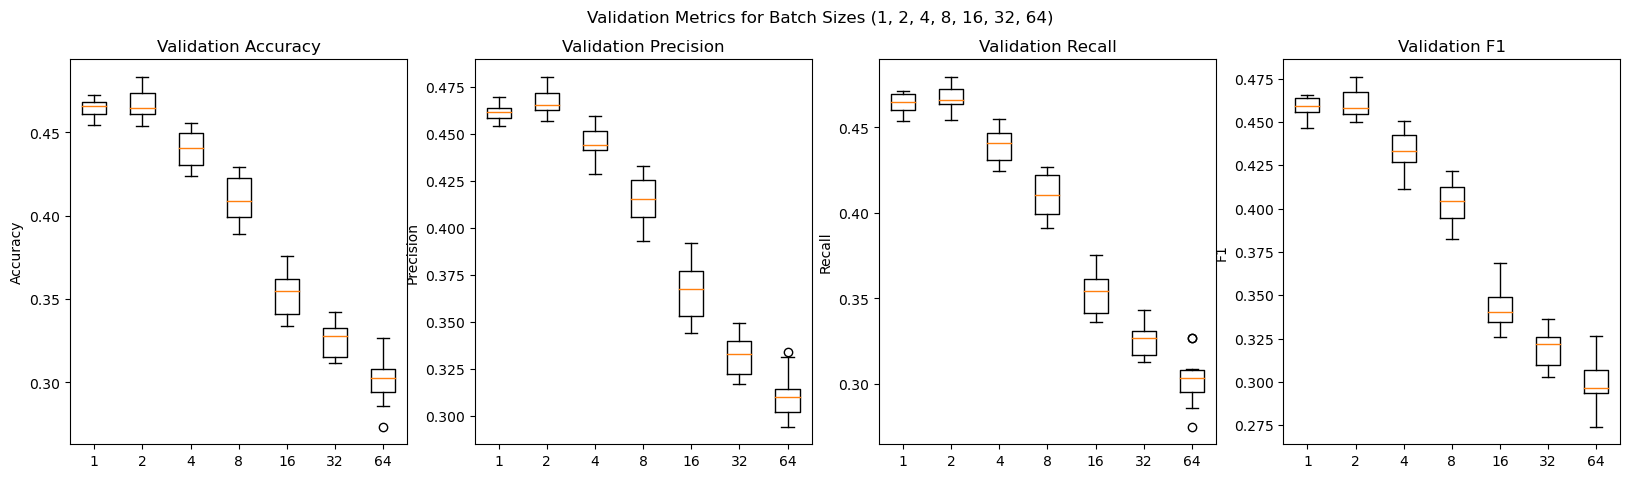

In [30]:
# Group plots for each metric (val_accuracy, val_precision, val_recall, val_f1) into a single figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Validation Metrics for Batch Sizes (1, 2, 4, 8, 16, 32, 64)')
# Align labels of y-axis for all subplots, only show the label for the first subplot
# Plot the boxplots for each metric in each subplot
axs[0].set_title('Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].boxplot([data_batch_size_1['val_accuracy'], data_batch_size_2['val_accuracy'], data_baseline['val_accuracy'], data_batch_size_8['val_accuracy'], data_batch_size_16['val_accuracy'], data_batch_size_32['val_accuracy'], data_batch_size_64['val_accuracy']], labels=['1', '2', '4', '8', '16', '32', '64'])
axs[1].set_title('Validation Precision')
axs[1].set_ylabel('Precision')
axs[1].boxplot([data_batch_size_1['val_precision'], data_batch_size_2['val_precision'], data_baseline['val_precision'], data_batch_size_8['val_precision'], data_batch_size_16['val_precision'], data_batch_size_32['val_precision'], data_batch_size_64['val_precision']], labels=['1', '2', '4', '8', '16', '32', '64'])
axs[2].set_title('Validation Recall')
axs[2].set_ylabel('Recall')
axs[2].boxplot([data_batch_size_1['val_recall'], data_batch_size_2['val_recall'], data_baseline['val_recall'], data_batch_size_8['val_recall'], data_batch_size_16['val_recall'], data_batch_size_32['val_recall'], data_batch_size_64['val_recall']], labels=['1', '2', '4', '8', '16', '32', '64'])
axs[3].set_title('Validation F1')
axs[3].set_ylabel('F1')
axs[3].boxplot([data_batch_size_1['val_f1'], data_batch_size_2['val_f1'], data_baseline['val_f1'], data_batch_size_8['val_f1'], data_batch_size_16['val_f1'], data_batch_size_32['val_f1'], data_batch_size_64['val_f1']], labels=['1', '2', '4', '8', '16', '32', '64'])
plt.show()